<a href="https://colab.research.google.com/github/LuisEduardoRB/EDP-II/blob/main/M%C3%A9todo_de_Galerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Programa en Python para la construcción simbólica, evaluación numérica y visualización de soluciones aproximadas y exactas usando SymPy, NumPy y Matplotlib

### Bloque 1: Definiciones simbólicas y construcción del residual

En este bloque se definen las variables, parámetros y funciones simbólicas usadas por SymPy para manipular expresiones matemáticas.

**$x$**

`x = sp.symbols('x', real=True)`  
Crea una variable simbólica real llamada $x$.  
Se usa como variable independiente en todas las expresiones y derivadas.

  
**$a_1, a_2$**

`a1, a2 = sp.symbols('a1 a2', real=True)`  
Son parámetros simbólicos que representan coeficientes desconocidos.  
Se mantienen como símbolos para construir expresiones generales antes de resolverlas.

  
**Funciones $\phi_1$ y $\phi_2$**

`phi1 = x*(1-x)`  
`phi2 = x**2*(1-x)`  

Son funciones polinomiales definidas simbólicamente.  
SymPy guarda la expresión completa y puede derivarlas, integrarlas o sustituir valores.

  
**Aproximación simbólica**

`u_g = a1*phi1 + a2*phi2`  
Construye una combinación lineal simbólica usando operadores algebraicos de SymPy.  
La expresión resultante se trata como una función simbólica de $x$.

  
**Residual**

`R = sp.diff(u_g, x, 2) + u_g + x`  

- `sp.diff(u_g, x, 2)` calcula la segunda derivada simbólica de la expresión respecto a $x$.  
- `+ u_g` suma la propia función.  
- `+ x` agrega el término simbólico $x$.

El resultado es una expresión simbólica almacenada en una estructura de árbol interno de SymPy.

  
**Construcción de ecuaciones**

`eq1 = sp.integrate(R*phi1, (x, 0, 1))`  
`eq2 = sp.integrate(R*phi2, (x, 0, 1))`  

- `sp.integrate` evalúa integrales definidas simbólicamente.  
- `(x,0,1)` indica variable y límites.  
- `R*phi1` y `R*phi2` son multiplicaciones simbólicas.

Cada `eq` produce una expresión que depende solo de $a_1$ y $a_2$.

  
**Solución simbólica**

`sol = sp.solve([sp.Eq(eq1, 0), sp.Eq(eq2, 0)], [a1, a2])`  

- `sp.Eq(expr,0)` convierte una expresión en una ecuación simbólica.  
- `sp.solve` resuelve simultáneamente ambas ecuaciones para los parámetros.  
- El resultado es un diccionario que asigna valores simbólicos a $a_1$ y $a_2$.

  
**Sustitución**

`u_g = u_g.subs({a1: a1_val, a2: a2_val})`  

- `subs` reemplaza símbolos por expresiones o números.  
- Aquí convierte $u_g$ en una expresión explícita sin parámetros libres.

`sp.simplify(u_g)` reorganiza la expresión en una forma más compacta.

In [6]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x=sp.symbols('x',real=True)
a1,a2=sp.symbols('a1 a2',real=True)
phi1=x*(1-x)
phi2=x**2*(1-x)
u_g=a1*phi1+a2*phi2
R=sp.diff(u_g,x,2)+u_g+x
eq1=sp.integrate(R*phi1,(x,0,1))
eq2=sp.integrate(R*phi2,(x,0,1))
sol=sp.solve([sp.Eq(eq1,0),sp.Eq(eq2,0)],[a1,a2])
a1_val=sp.simplify(sol[a1])
a2_val=sp.simplify(sol[a2])
print("Coeficientes de Galerkin:")
print("a1 =",a1_val)
print("a2 =",a2_val)
u_g=u_g.subs({a1:a1_val,a2:a2_val})
u_g_simplified=sp.simplify(u_g)
print("\nAproximación u_G(x) =")
print(u_g_simplified)

Coeficientes de Galerkin:
a1 = 71/369
a2 = 7/41

Aproximación u_G(x) =
x*(-63*x**2 - 8*x + 71)/369


### Bloque 2: Definición simbólica de la solución exacta

En este bloque únicamente se define una función simbólica que representa la solución exacta y se simplifica.

  
**Definición simbólica**

`u_exact = sp.sin(x)/sp.sin(1) - x`  

- `sp.sin(x)` crea una función seno simbólica.  
- `sp.sin(1)` es una constante simbólica evaluada en $1$.  
- La división y la resta se manejan internamente como operaciones simbólicas.

La expresión obtenida sigue siendo manipulable por SymPy.

  
**Simplificación**

`u_exact_simplified = sp.simplify(u_exact)`  

- `simplify` combina factores, reduce términos y reorganiza la expresión.  
- No cambia la función, solo su forma representada.

  
El propósito del bloque es dejar definida una expresión simbólica que luego puede convertirse en función numérica y evaluarse en un mallado.

In [7]:
u_exact=sp.sin(x)/sp.sin(1)-x
u_exact_simplified=sp.simplify(u_exact)
print("\nSolución exacta u(x) =")
print(u_exact_simplified)


Solución exacta u(x) =
-x + sin(x)/sin(1)


### Bloque 3: Conversión a funciones numéricas y evaluación en un mallado

Aquí se convierten expresiones simbólicas en funciones numéricas de Numpy y se evalúan sobre un grid.

  
**Conversión con `lambdify`**

`u_g_func = sp.lambdify(x, u_g_simplified, 'numpy')`  
`u_exact_func = sp.lambdify(x, u_exact_simplified, 'numpy')`  

- `lambdify` toma una expresión simbólica y produce una función que opera con arreglos NumPy.  
- El primer argumento indica la variable simbólica.  
- El segundo la expresión simbólica.  
- El tercero especifica que use las funciones numéricas de NumPy.

Las funciones resultantes aceptan arreglos como entrada y devuelven arreglos como salida.

  
**Mallado**

`x_vals = np.linspace(0, 1, 400)`  

- `linspace(a,b,n)` genera $n$ valores igualmente espaciados entre $a$ y $b$.  
- Produce un arreglo NumPy de 400 puntos flotantes.

  
**Evaluación**

`u_g_vals = u_g_func(x_vals)`  
`u_exact_vals = u_exact_func(x_vals)`  

Ambas evalúan las funciones numéricas punto por punto sobre el mallado.

  
**Cálculo del error**

`error_vals = u_exact_vals - u_g_vals`  

Realiza resta elemento a elemento usando broadcasting de NumPy.  
El resultado es otro arreglo NumPy del mismo tamaño.


In [8]:
u_g_func=sp.lambdify(x,u_g_simplified,'numpy')
u_exact_func=sp.lambdify(x,u_exact_simplified,'numpy')
x_vals=np.linspace(0,1,400)
u_g_vals=u_g_func(x_vals)
u_exact_vals=u_exact_func(x_vals)
error_vals=u_exact_vals-u_g_vals

### Bloque 4: Visualización de resultados con Matplotlib

Este bloque usa exclusivamente funciones de Matplotlib para construir dos gráficas: una comparación y un error.

  
**Creación de la figura**

`plt.figure(figsize=(10,5))`  

- Crea un lienzo gráfico de 10×5 pulgadas.  
- Es el contenedor general de todas las subgráficas.

  
**Subgráfica 1: comparación**

`plt.subplot(1,2,1)`  

- Divide la figura en una matriz de $1\times 2$ subgráficas.  
- Activa la primera.

  
`plt.plot(x_vals, u_exact_vals, label='Solución exacta')`  
`plt.plot(x_vals, u_g_vals, '--', label='Galerkin $u_G$')`  

- Dibuja un arreglo contra otro.  
- `'--'` indica línea discontinua.  
- `label` asigna una etiqueta para la leyenda.

  
`plt.xlabel('x')`  
`plt.ylabel('u(x)')`  
`plt.title('Solución exacta vs Galerkin')`  
`plt.legend()`  
`plt.grid(True)`  

Son configuraciones estándar: nombres de ejes, título, leyenda y cuadrícula.

  
**Subgráfica 2: error**

`plt.subplot(1,2,2)` activa la segunda subgráfica.

`plt.plot(x_vals, error_vals)` dibuja el error en función del dominio.

El resto (`xlabel`, `ylabel`, `title`, `grid`) son las mismas funciones explicadas arriba, aplicadas en este nuevo panel.

  
**Ajuste y visualización**

`plt.tight_layout()` organiza automáticamente los espacios entre figuras.  
`plt.show()` renderiza la figura completa.

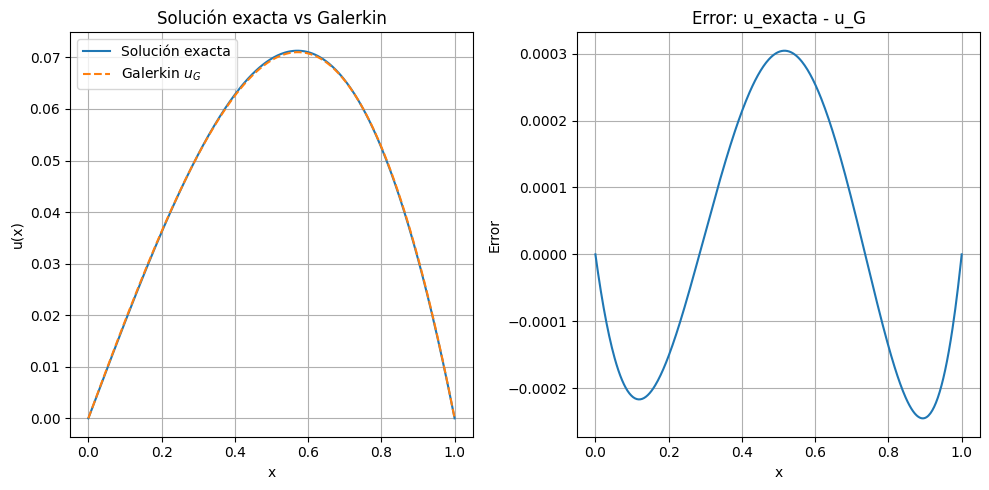

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x_vals,u_exact_vals,label='Solución exacta')
plt.plot(x_vals,u_g_vals,'--',label='Galerkin $u_G$')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Solución exacta vs Galerkin')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(x_vals,error_vals)
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error: u_exacta - u_G')
plt.grid(True)

plt.tight_layout()
plt.show()